In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
df_Hr = pd.read_csv("/content/HR_Dataset.csv")
df_Hr.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
df_Hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
df_Hr.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
df_Hr.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
df_Hr.describe().T.style.background_gradient()


,count,mean,std,min,25%,50%,75%,max
EmpID,311.000000,10156.000000,89.922189,10001.000000,10078.500000,10156.000000,10233.500000,10311.000000
MarriedID,311.000000,0.398714,0.490423,0.000000,0.000000,0.000000,1.000000,1.000000
MaritalStatusID,311.000000,0.810289,0.943239,0.000000,0.000000,1.000000,1.000000,4.000000
GenderID,311.000000,0.434084,0.496435,0.000000,0.000000,0.000000,1.000000,1.000000
EmpStatusID,311.000000,2.392283,1.794383,1.000000,1.000000,1.000000,5.000000,5.000000
DeptID,311.000000,4.610932,1.083487,1.000000,5.000000,5.000000,5.000000,6.000000
PerfScoreID,311.000000,2.977492,0.587072,1.000000,3.000000,3.000000,3.000000,4.000000
FromDiversityJobFairID,311.000000,0.093248,0.291248,0.000000,0.000000,0.000000,0.000000,1.000000
Salary,311.000000,69020.684887,25156.636930,45046.000000,55501.500000,62810.000000,72036.000000,250000.000000
Termd,311.000000,0.334405,0.472542,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df_Hr.fillna("0",inplace=True)
df_Hr.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [ ]:
df_Hr.duplicated().sum()

0

In [ ]:
df_Hr.drop_duplicates(inplace=True)

In [ ]:
## Exploratory Data Analysis

In [ ]:
df_Hr.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [ ]:
df_Hr.Salary.sort_values(ascending=False).head(10)

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

<ipython-input-30-6a795ebeec11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Hr.corr(),annot=True)


<Axes: >

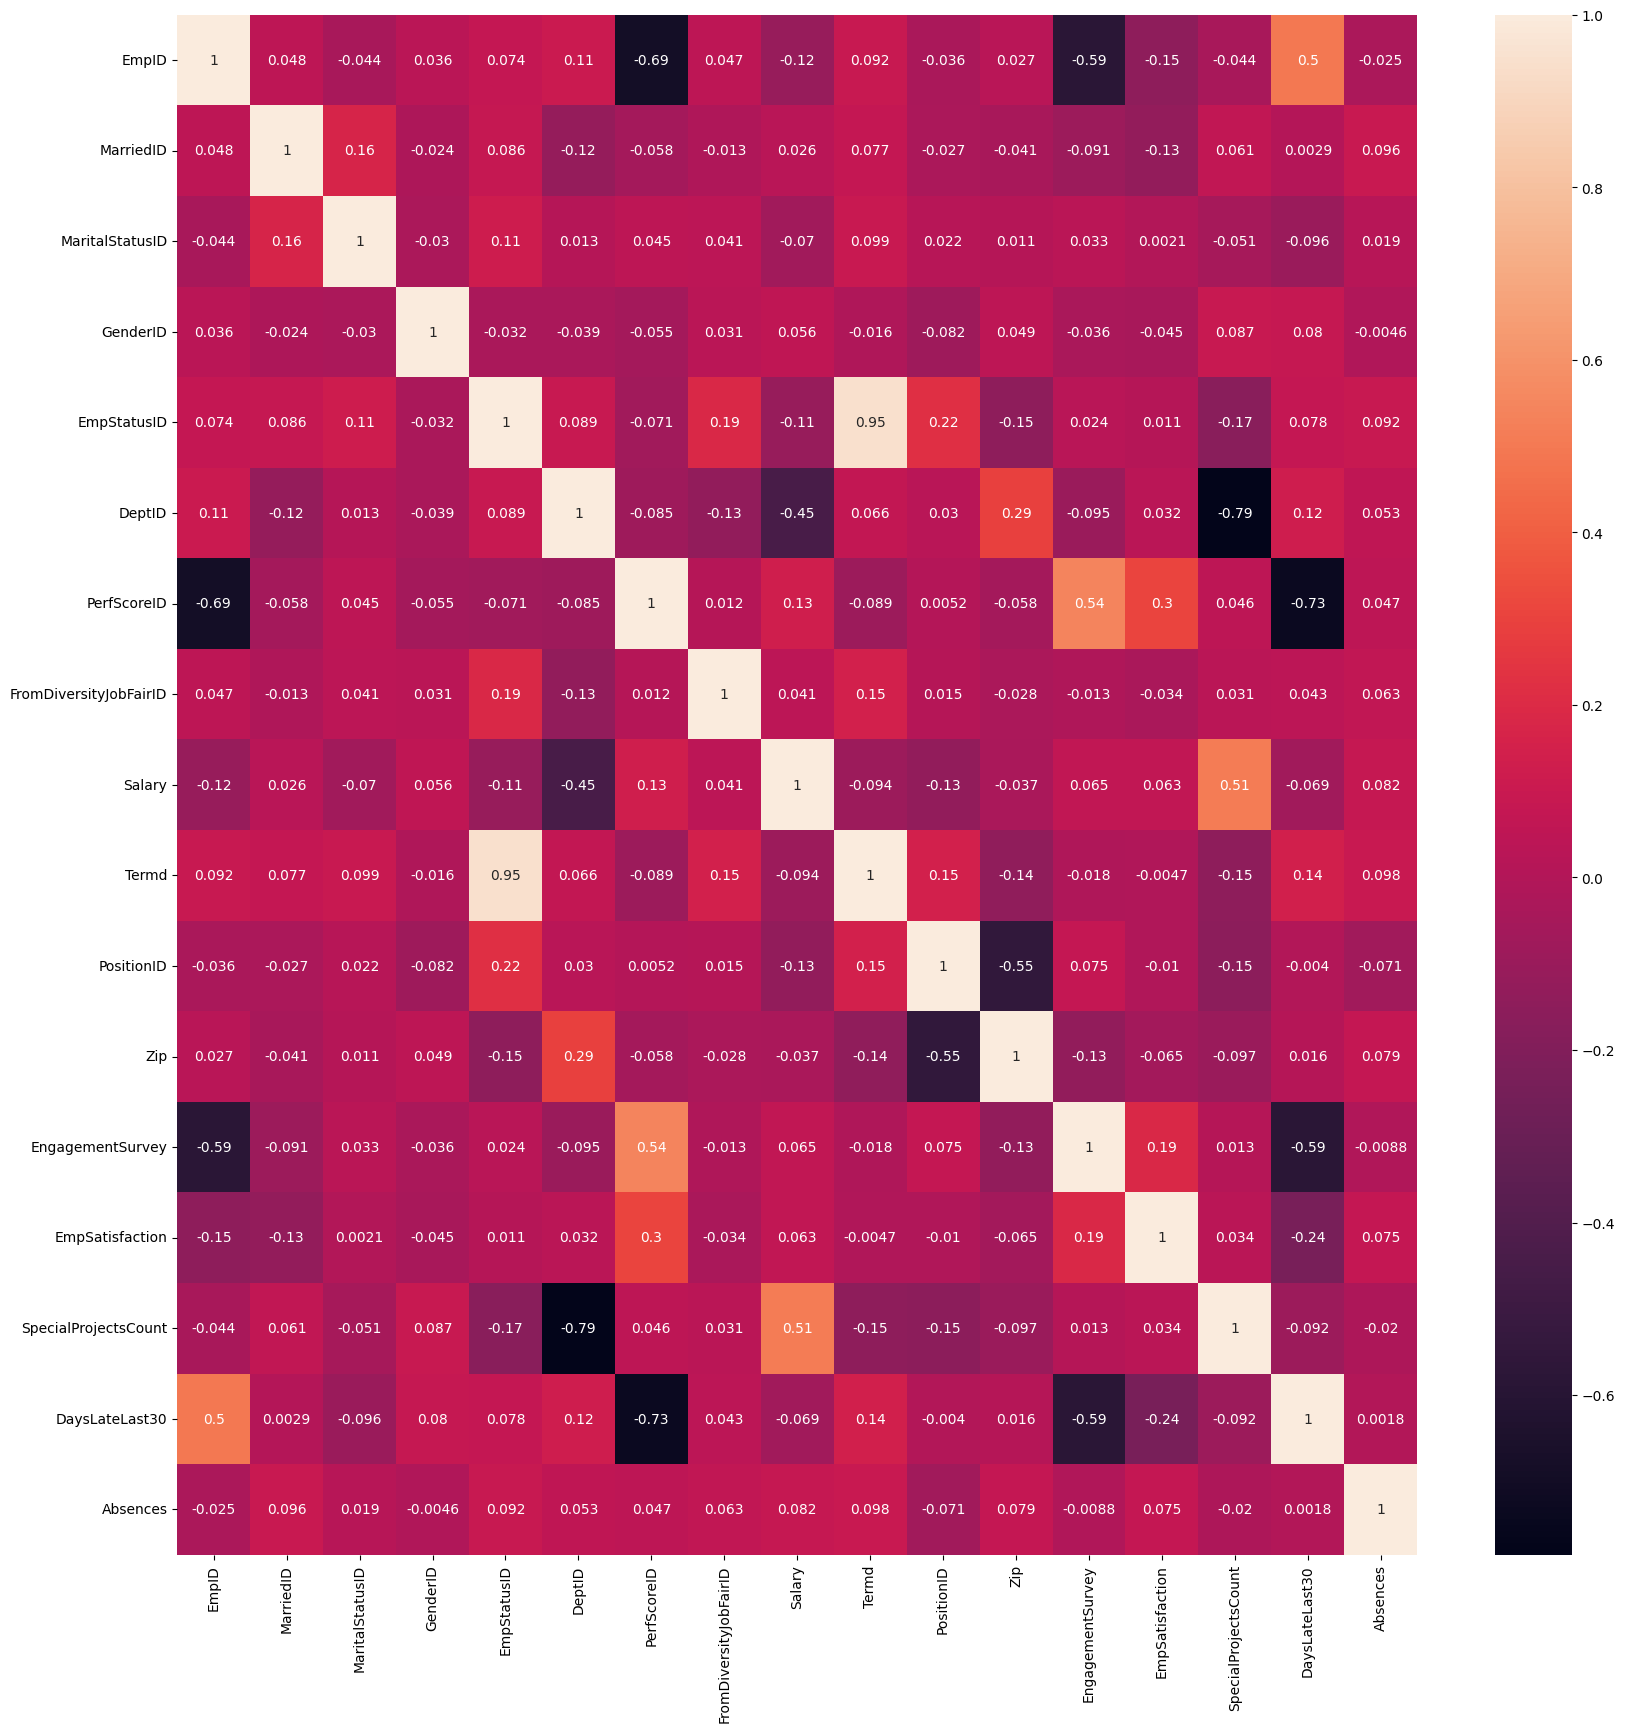

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_Hr.corr(),annot=True)


array([[<Axes: title={'center': 'EmpID'}>,
        <Axes: title={'center': 'MarriedID'}>,
        <Axes: title={'center': 'MaritalStatusID'}>,
        <Axes: title={'center': 'GenderID'}>],
       [<Axes: title={'center': 'EmpStatusID'}>,
        <Axes: title={'center': 'DeptID'}>,
        <Axes: title={'center': 'PerfScoreID'}>,
        <Axes: title={'center': 'FromDiversityJobFairID'}>],
       [<Axes: title={'center': 'Salary'}>,
        <Axes: title={'center': 'Termd'}>,
        <Axes: title={'center': 'PositionID'}>,
        <Axes: title={'center': 'Zip'}>],
       [<Axes: title={'center': 'EngagementSurvey'}>,
        <Axes: title={'center': 'EmpSatisfaction'}>,
        <Axes: title={'center': 'SpecialProjectsCount'}>,
        <Axes: title={'center': 'DaysLateLast30'}>],
       [<Axes: title={'center': 'Absences'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

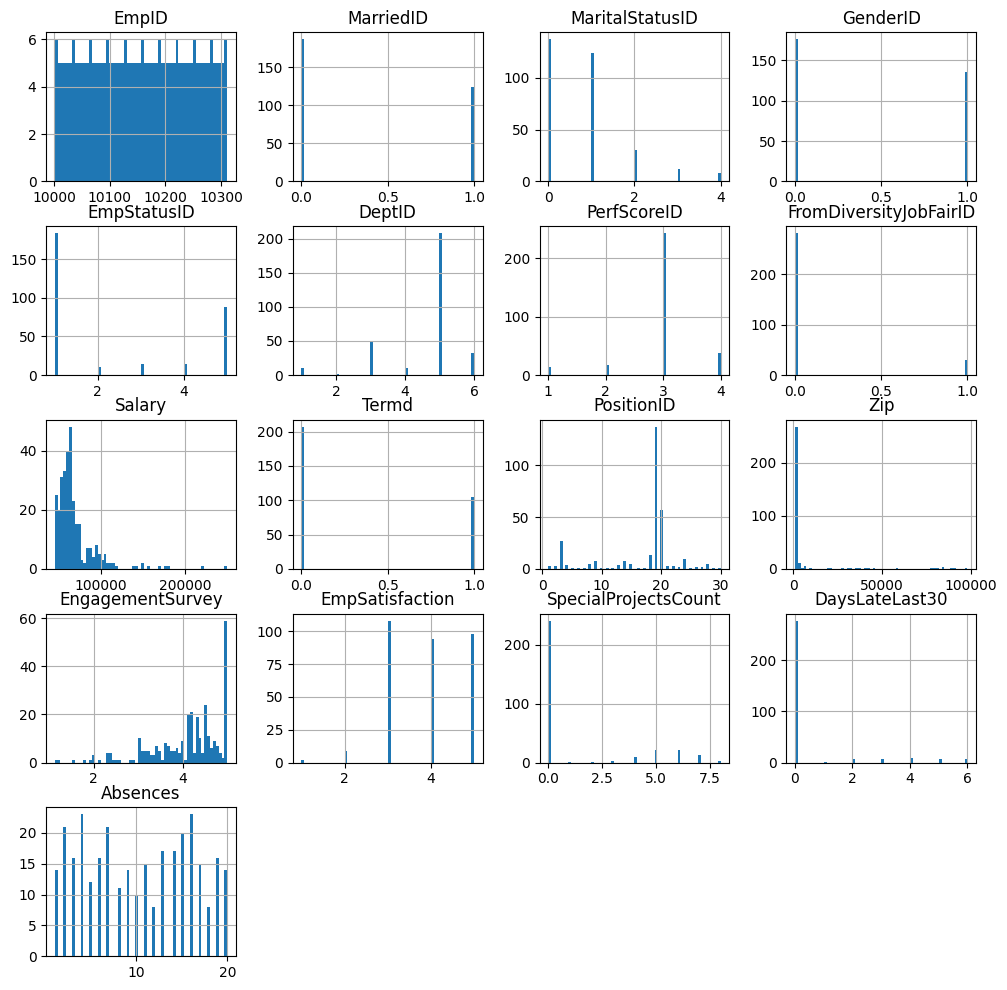

In [ ]:
df_Hr.hist(bins=60,figsize=(12,12))

In [ ]:
#sns.pairplot(df_Hr)

In [ ]:
df_Hr["PerformanceScore"]
#df_Hr["PerformanceScore"].unique()

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

<ipython-input-34-230d3aab7329>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PerformanceScore",data=df_Hr,palette="viridis")


<Axes: xlabel='PerformanceScore', ylabel='count'>

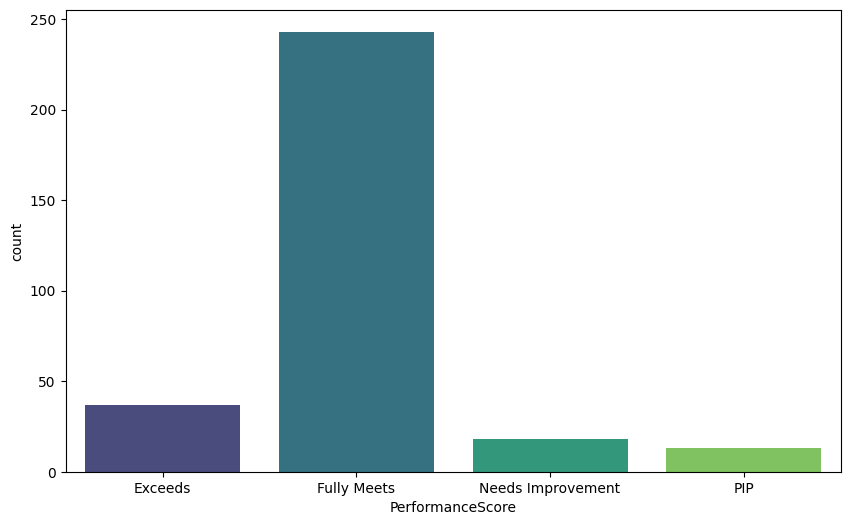

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="PerformanceScore",data=df_Hr,palette="viridis")

<Axes: xlabel='PerformanceScore', ylabel='count'>

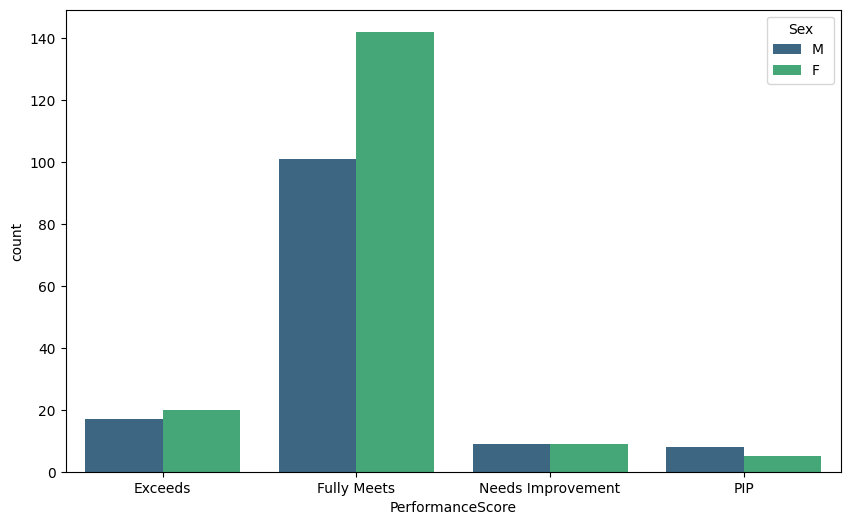

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="PerformanceScore",data=df_Hr,hue = "Sex",palette="viridis")

<Axes: xlabel='PerformanceScore', ylabel='count'>

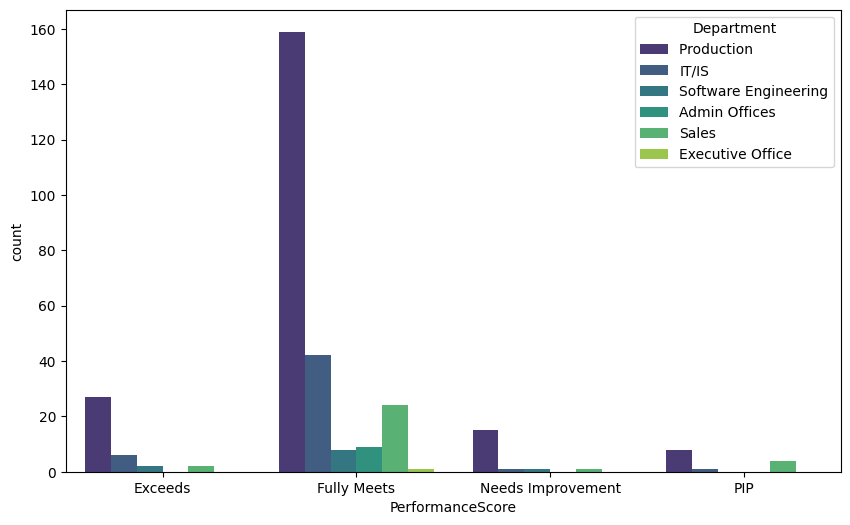

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="PerformanceScore",data=df_Hr,hue = "Department",palette="viridis")

<Axes: xlabel='PerformanceScore', ylabel='count'>

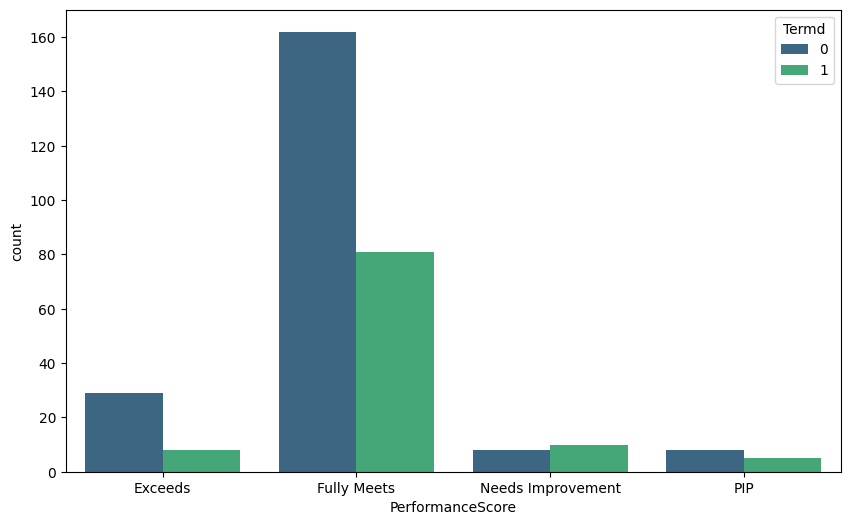

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="PerformanceScore",hue="Termd",data=df_Hr,palette="viridis")

<ipython-input-38-3073c072ab1b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex",data=df_Hr,palette="viridis")


<Axes: xlabel='Sex', ylabel='count'>

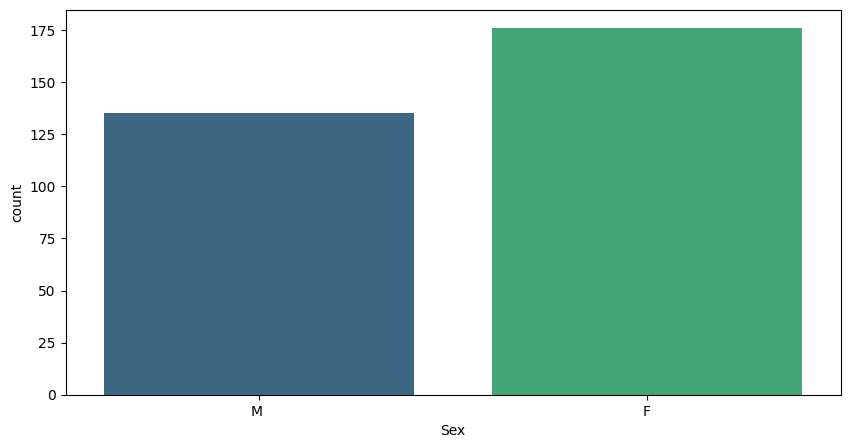

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Sex",data=df_Hr,palette="viridis")

In [ ]:
df_Hr["RecruitmentSource"].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

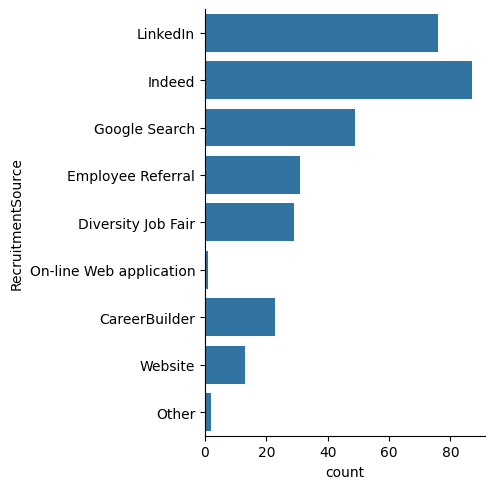

In [ ]:
sns.catplot(y="RecruitmentSource",kind="count",data=df_Hr)

<ipython-input-41-862b4ccff26b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Hr["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

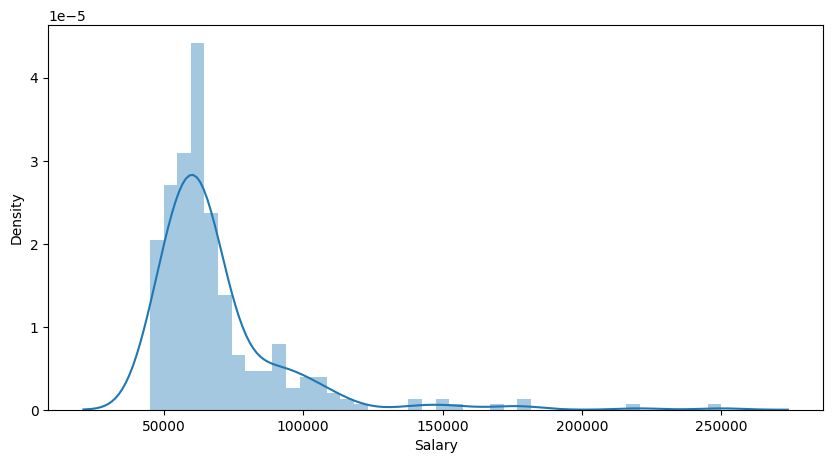

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_Hr["Salary"])

In [ ]:
df_Hr.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [ ]:
df_Hr["HispanicLatino"].value_counts()

No     282
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

<Axes: xlabel='HispanicLatino', ylabel='count'>

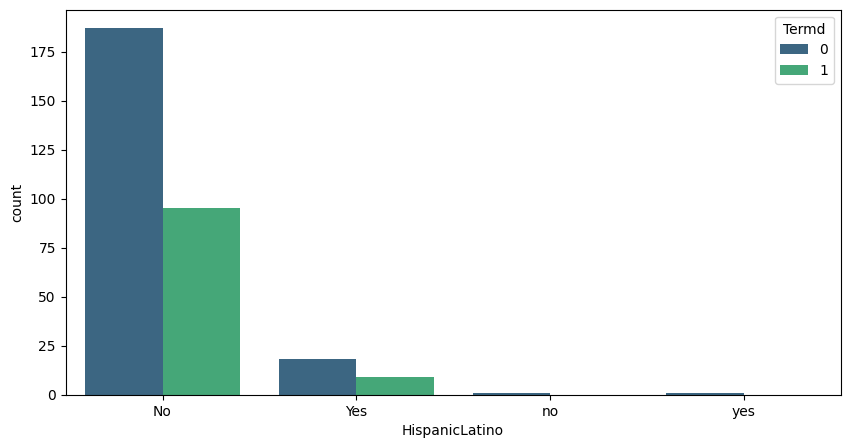

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='HispanicLatino', data=df_Hr, hue = 'Termd', palette='viridis')

In [ ]:
df_select = df_Hr[['MaritalDesc','Sex', 'EmploymentStatus', 'Department', 'PerformanceScore',  'Position', 'CitizenDesc', 'HispanicLatino',
          'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction', 'SpecialProjectsCount','Salary', 'DaysLateLast30', 'Absences', 'Termd']]

In [ ]:
df_select.head(6)

,MaritalDesc,Sex,EmploymentStatus,Department,PerformanceScore,Position,CitizenDesc,HispanicLatino,RaceDesc,ManagerName,RecruitmentSource,EmpSatisfaction,SpecialProjectsCount,Salary,DaysLateLast30,Absences,Termd
0,Single,M,Active,Production,Exceeds,Production Technician I,US Citizen,No,White,Michael Albert,LinkedIn,5,0,62506,0,1,0
1,Married,M,Voluntarily Terminated,IT/IS,Fully Meets,Sr. DBA,US Citizen,No,White,Simon Roup,Indeed,3,6,104437,0,17,1
2,Married,F,Voluntarily Terminated,Production,Fully Meets,Production Technician II,US Citizen,No,White,Kissy Sullivan,LinkedIn,3,0,64955,0,3,1
3,Married,F,Active,Production,Fully Meets,Production Technician I,US Citizen,No,White,Elijiah Gray,Indeed,5,0,64991,0,15,0
4,Divorced,F,Voluntarily Terminated,Production,Fully Meets,Production Technician I,US Citizen,No,White,Webster Butler,Google Search,4,0,50825,0,2,1
5,Single,F,Active,Production,Exceeds,Production Technician I,US Citizen,No,White,Amy Dunn,LinkedIn,5,0,57568,0,15,0


In [ ]:
#df_select.columns[:-5]
df_dummies = pd.get_dummies(df_select,columns=df_select.columns[:-5],drop_first=True)
df_dummies

,SpecialProjectsCount,Salary,DaysLateLast30,Absences,Termd,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,Sex_M,...,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,EmpSatisfaction_2,EmpSatisfaction_3,EmpSatisfaction_4,EmpSatisfaction_5
0,0,62506,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,6,104437,0,17,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,64955,0,3,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,64991,0,15,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,50825,0,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,65893,0,13,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
307,0,48513,5,4,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
308,6,220450,0,16,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
309,5,89292,0,11,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_dummies.shape

(311, 93)

In [ ]:
#splitting Data
X=df_dummies.drop("Termd",axis=1)
y=df_dummies["Termd"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=22)
oversample = SMOTE(random_state=22)
X_train , y_train =oversample.fit_resample(X_train,y_train)

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      1
      ..
321    1
322    1
323    1
324    1
325    1
Name: Termd, Length: 326, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "K_Nearest Neighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "Support Vector Machine" :SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Neural Network":MLPClassifier(),
    "Random Forest" : RandomForestClassifier(n_estimators=500),
    "XGBClassifier" : XGBClassifier(n_estimators=500)

}
for name ,model in models.items():
  model.fit(X_train,y_train)
  print(name+" Trained.")

K_Nearest Neighbors Trained.
LogisticRegression Trained.
Support Vector Machine Trained.
Decision Tree Trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Trained.
Random Forest Trained.
XGBClassifier Trained.


In [ ]:
y_pred = model.predict(X_test)
for name , model in models.items():
    print(name + "Accuracy:{:.2f}%".format(model.score(X_test,y_pred)*100))
    print(classification_report(y_test,y_pred))



K_Nearest NeighborsAccuracy:63.49%
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.90      1.00      0.95        19

    accuracy                           0.97        63
   macro avg       0.95      0.98      0.96        63
weighted avg       0.97      0.97      0.97        63

LogisticRegressionAccuracy:95.24%
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.90      1.00      0.95        19

    accuracy                           0.97        63
   macro avg       0.95      0.98      0.96        63
weighted avg       0.97      0.97      0.97        63

Support Vector MachineAccuracy:93.65%
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.90      1.00      0.95        19

    accuracy                           0.97        63
   macro avg       0.